<a href="https://colab.research.google.com/github/kmodi-2428/my_classwork/blob/main/china_gdp__(krish).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score


In [ ]:
data = pd.read_csv("/content/china_gdp.csv")
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
data.corr()

,Year,Value
Year,1.000000,0.723858
Value,0.723858,1.000000


In [ ]:
# we are using
"""


yhat=mx+c ==>67%

yhat=mlog(x)+c ==>67.5%

log(yhat)=mx+c

log(yhat)=m1x+m2x^2+c



"""
# HERE X = Year AND Y = Value

GDP = smf.ols("Value~Year",data=data).fit() #YHAT = MX+C
GDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     58.34
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.25e-10
Time:                        13:38:47   Log-Likelihood:                -1627.2
No. Observations:                  55   AIC:                             3258.
Df Residuals:                      53   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.23e+14   2.94e+13     -7.589      0.000   -2.82e+14   -1.64e+14
Year         1.13e+11   1.48e+10      7.638      0.000    8.33e+10    1.43e+11
==============================================================================
Omnibus:                       22.122   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                           1.468   Prob(JB):                     1.52e-07
Kurtosis:                       5.255   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# yhat=mlog(x)+c
# where y = 'value' and x = 'log(year)'
GDP1= smf.ols("Value~np.log(Year)",data=data).fit()
GDP1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     57.66
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.01e-10
Time:                        13:38:49   Log-Likelihood:                -1627.4
No. Observations:                  55   AIC:                             3259.
Df Residuals:                      53   BIC:                             3263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.698e+15   2.24e+14     -7.587      0.000   -2.15e+15   -1.25e+15
np.log(Year)  2.238e+14   2.95e+13      7.593      0.000    1.65e+14    2.83e+14
==============================================================================
Omnibus:                       22.265   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.746
Skew:                           1.474   Prob(JB):                     1.28e-07
Kurtosis:                       5.271   Cond. No.                     7.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:          np.log(Value)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1288.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           7.32e-39
Time:                        13:39:54   Log-Likelihood:                -13.201
No. Observations:                  55   AIC:                             30.40
Df Residuals:                      53   BIC:                             34.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -163.0204      5.289    -30.822      0.0

<ipython-input-13-0ccd016fdeca>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Value')

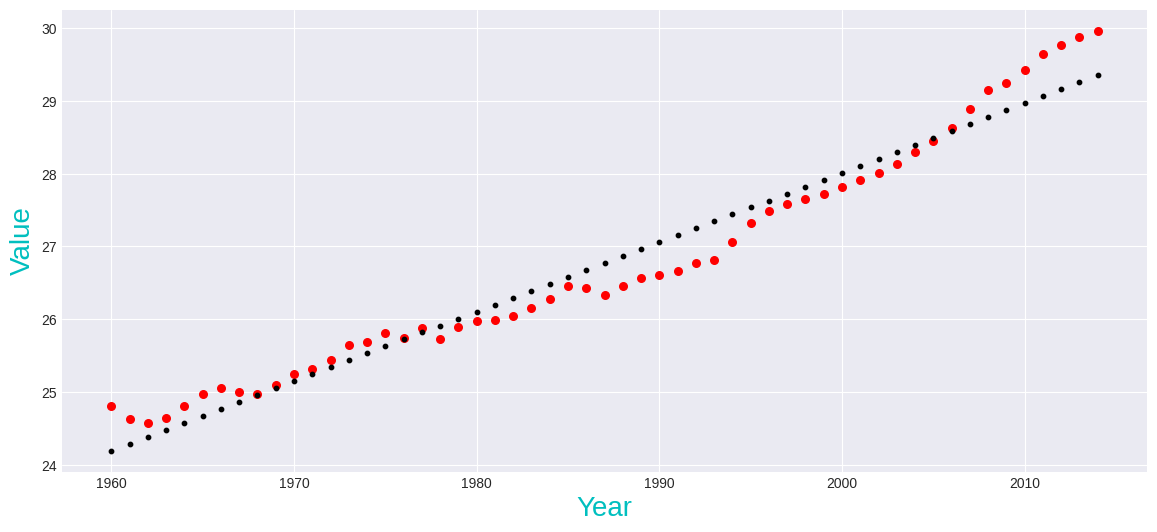

In [ ]:
# log(yhat)=mx+c
# where log(yhat)=np.log(value) and x = (year)

GDP2 = smf.ols("np.log(Value)~Year",data=data).fit()
print(GDP2.summary())


plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["Year"],np.log(data["Value"]),color="red",s=30)
plt.scatter(data["Year"],GDP2.fittedvalues,color="black",s=10)


plt.xlabel("Year",size=20,color="c")
plt.ylabel("Value",size=20,color="c")

In [ ]:
# log(yhat)=m1x+m2x^2+c
# where log(yhat)= np.log(Value) and m1x+m2x^2 = Year+pow(year,2)
GDP3 = smf.ols('np.log(Value)~Year+pow(Year,2)',data=data).fit()
GDP3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Value)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3071.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.06e-54
Time:                        18:39:17   Log-Likelihood:                 29.405
No. Observations:                  55   AIC:                            -52.81
Df Residuals:                      52   BIC:                            -46.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4621.0205    344.526     13.413      0.000    3929.679    5312.362
Year            -4.7201      0.347    -13.611      0.000      -5.416      -4.024
pow(Year, 2)     0.0012   8.73e-05     13.886      0.000       0.001       0.001
==============================================================================
Omnibus:                        2.069   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.334
Skew:                           0.066   Prob(JB):                        0.513
Kurtosis:                       2.248   Cond. No.                     6.92e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""